## Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1


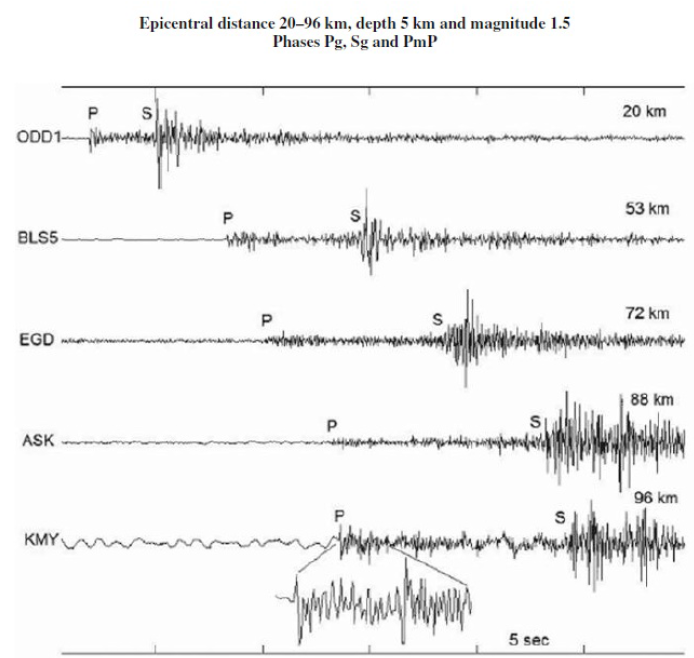

Los observatorios sismológicos clasifican las señales sísmicas de acuerdo a la diferencia de tiempo de arribo entre la onda P y la onda S, conocida como S-P. La S-P, es una indicación de la distancia que existe desde el punto donde se genera el sismo al punto donde se encuentra la estación que lo registra, es decir de la distancia epicentral. Dicho parámetro, aplicado a las señales registradas
por el OSQ permite definir tres tipos de sismos: local, caracterizado por tener una S-P menor a 20 s; regional cuya S-P varía entre 20 s y 180 s y telesismo, cuya S-P es mayor 180 s.

In [1]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc


In [3]:
#GitHub al parecer le cambia la versión a los archivos por lo que se genera error al intentar descargarlos con scipy.

# !wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/263aefa1bba9d70996db24e26db9f0a7a5180b77/sisLoc.mat"
# !wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/263aefa1bba9d70996db24e26db9f0a7a5180b77/sisReg.mat"
# !wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/263aefa1bba9d70996db24e26db9f0a7a5180b77/sisTele.mat"

In [4]:
# Sismo Local
ruta_Sismo = 'https://drive.google.com/file/d/1FRN0Pz4AtNh5ijx1j5qoIJd3ua3G4CRZ/view?usp=share_link'
!gdown  "1FRN0Pz4AtNh5ijx1j5qoIJd3ua3G4CRZ&confirm=t" -O 'sisLoc.mat' # sismo regional

#Sismo Regional
ruta_Sismo = 'https://drive.google.com/file/d/1dmYuw6VxUU8R-irxmffDX4UpcJj7XSoz/view?usp=share_link'
!gdown  "1dmYuw6VxUU8R-irxmffDX4UpcJj7XSoz&confirm=t" -O 'sisReg.mat' # sismo regional

#Tele-Sismicos
ruta_Sismo = 'https://drive.google.com/file/d/1mnVN62l_ga5f4hzhoWJQx8TaQqAXbY_H/view?usp=share_link'
!gdown  "1mnVN62l_ga5f4hzhoWJQx8TaQqAXbY_H&confirm=t" -O 'sisTele.mat' # sismo regional

Downloading...
From: https://drive.google.com/uc?id=1FRN0Pz4AtNh5ijx1j5qoIJd3ua3G4CRZ&confirm=t
To: /content/sisLoc.mat
100% 753k/753k [00:00<00:00, 58.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dmYuw6VxUU8R-irxmffDX4UpcJj7XSoz&confirm=t
To: /content/sisReg.mat
100% 1.92M/1.92M [00:00<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mnVN62l_ga5f4hzhoWJQx8TaQqAXbY_H&confirm=t
To: /content/sisTele.mat
100% 1.81M/1.81M [00:00<00:00, 136MB/s]


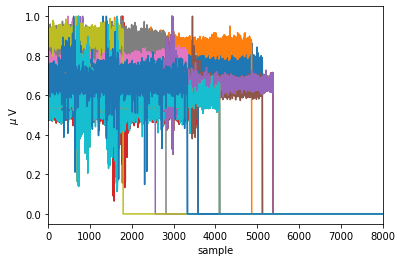

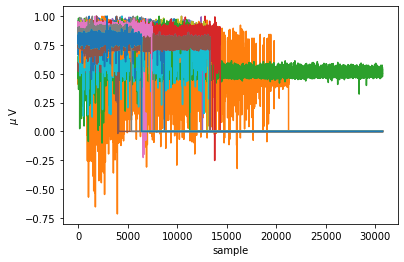

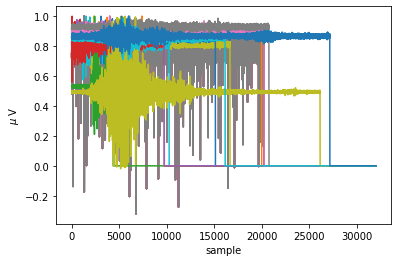

In [5]:
data_Loc = sc.loadmat('sisLoc.mat')
data_Reg = sc.loadmat('sisReg.mat')
data_Tele = sc.loadmat('sisTele.mat')

data_Loc.keys() # variables del diccionario
data_Reg .keys() # variables del diccionario
data_Tele.keys() # variables del diccionario

Y_Loc = data_Loc['Y']
fs_Loc = data_Loc['fs'][0][0]
Y_Reg = data_Reg ['Y']
fs_Reg = data_Reg ['fs'][0][0]
Y_Tele = data_Tele['Y']
fs_Tele = data_Tele['fs'][0][0]

plt.plot(Y_Loc.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.xlim(0,8000)
plt.show()

plt.plot(Y_Reg.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
#plt.xlim(0,15000)
plt.show()

plt.plot(Y_Tele.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
#plt.xlim(0,15000)
plt.show()

### Se eliminan todos los 0s que están al final de cada señal y se calcula  la media de cada una de esta, por último se le quita el nivel DC.

In [6]:
data=[]
dataLoc=[]
dataReg=[]
dataTele=[]

for i in range(21):
  data=Y_Loc[i]
  while data[-1] == 0:
     data=data[:-1]

  dataLoc.append(data-np.mean(data))
  data=Y_Reg[i]
  while data[-1] == 0:
     data=data[:-1]

  dataReg.append(data-np.mean(data))
  data=Y_Tele[i]
  while data[-1] == 0:
     data=data[:-1]

  dataTele.append(data-np.mean(data))


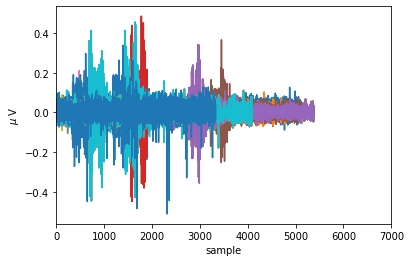

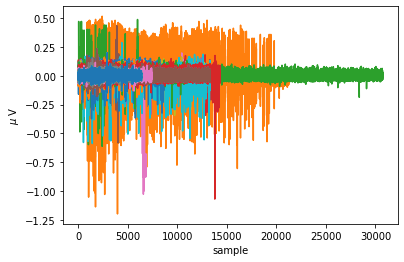

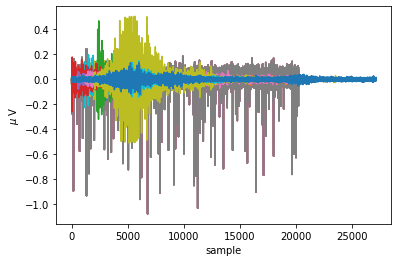

In [7]:
for i in dataLoc:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.xlim(0,7000)
plt.show()

for i in dataReg:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
#plt.xlim(0,8000)
plt.show()

for i in dataTele:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
#plt.xlim(0,8000)
plt.show()

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import sosfreqz
import numpy as np

## scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)

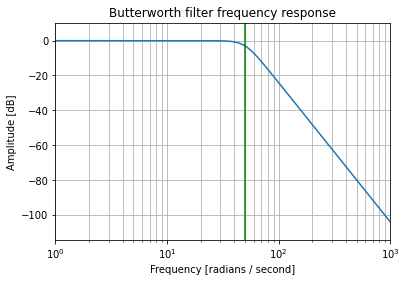

In [9]:
b, a = signal.butter(4, 50, 'low', analog=True) #Coeficientes de la dunción de transferencia
w, h = signal.freqs(b, a)  #Filtro análogo
plt.semilogx(w, 20 * np.log10(abs(h))) #Decibeles
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(50, color='green') # cutoff frequency
plt.show()

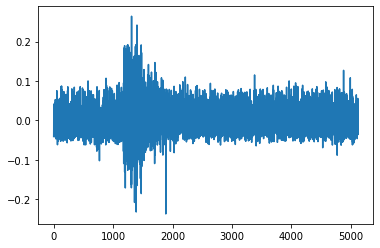

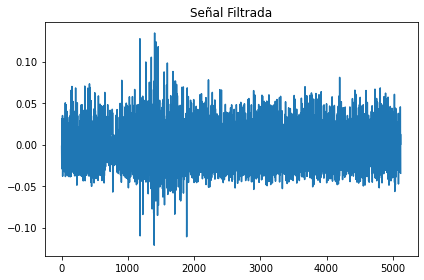

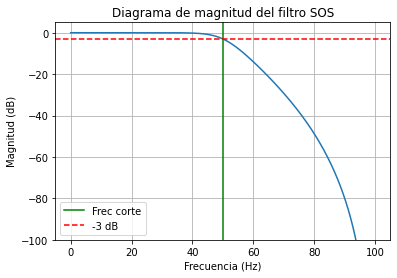

In [10]:
#Señal sin filtrar
plt.plot(dataLoc[0])
plt.show()

#Coeficientes del filtro SOS (Second-Order Sections)
sos = signal.butter(5, 50, 'low', fs=200, output='sos')

for i in range(21):
  dataLoc[i] = signal.sosfilt(sos, dataLoc[i])
  dataReg[i] = signal.sosfilt(sos, dataReg[i])
  dataTele[i] = signal.sosfilt(sos, dataTele[i])



plt.plot(dataLoc[0])
plt.title('Señal Filtrada')
plt.tight_layout()
plt.show()

# Definir la frecuencia de muestreo y la frecuencia de corte
fs = 200 # Hz
fc = 50 # Hz

# Calcular la respuesta en frecuencia del filtro SOS
w, h = sosfreqz(sos, worN=2000)  #worN+ numero de puntos de frecuencia

# Calcular la magnitud de la respuesta en frecuencia en dB
mag = 20*np.log10(np.abs(h))

# Graficar el diagrama de magnitud
plt.plot(w/(2*np.pi)*fs, mag)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.title("Diagrama de magnitud del filtro SOS")
plt.axvline(50, color='green', label="Frec corte") # cutoff frequency
plt.axhline(y=-3, color='red', linestyle='--', label="-3 dB")
plt.legend()
plt.grid(which='both', axis='both')
plt.ylim(-100,5)
plt.show()

In [11]:
from ipywidgets import interact

In [12]:
@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = Y_Loc[idx,:] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()

@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = dataLoc[idx] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()

interactive(children=(IntSlider(value=10, description='idx', max=20), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=10, description='idx', max=20), Output()), _dom_classes=('widget-interac…

# Hasta aquí he desarrollado el MiniPoryecto, el resto del codigo es el codigo base que nos proporciono el porfesor.

Como se muestra en figura superior se ven los sismos

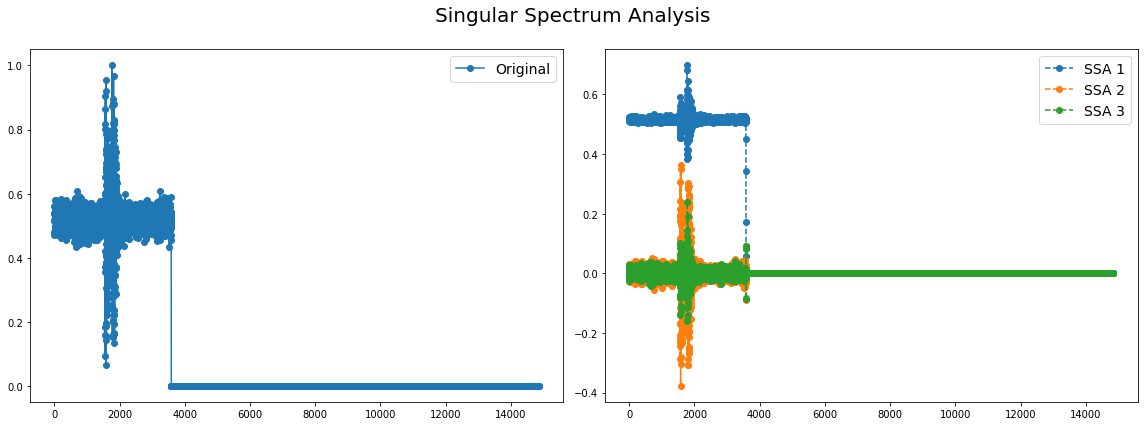

In [13]:
# We decompose the time series into three subseries
X = Y_Loc # Conjunto de 21 sismos
groups = 3
# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))
idSignal = 3
ax1 = plt.subplot(121)
ax1.plot(X[idSignal], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)

for i in range(groups):
    ax2.plot(X_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

(<Axes: >, [<matplotlib.lines.Line2D at 0x7fc750352a30>])

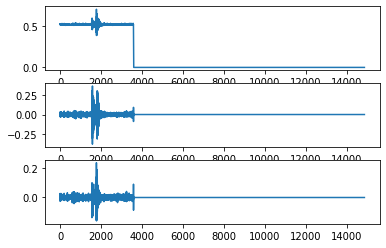

In [14]:
plt.subplot(3,1,1),plt.plot(X_ssa[idSignal, 0])
plt.subplot(3,1,2),plt.plot(X_ssa[idSignal, 1])
plt.subplot(3,1,3),plt.plot(X_ssa[idSignal, 2])

## DataFrames en PANDAS

In [15]:
import pandas as pd

d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
       "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
     }
 

df = pd.DataFrame(d)  

In [16]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [17]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

In [18]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


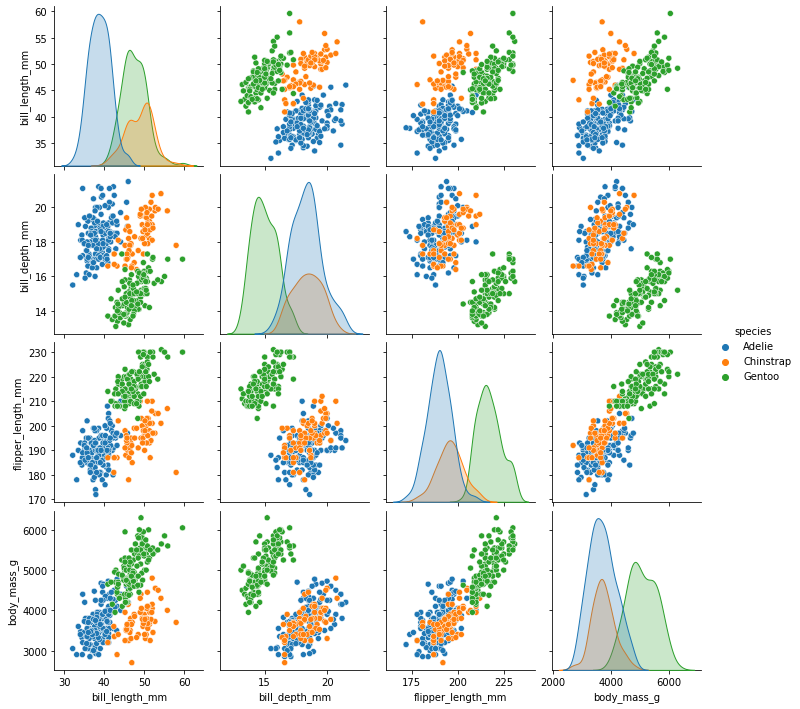

In [19]:
sns.pairplot(penguins, hue="species")

## Numpy Array to DataFrame

In [20]:
import pandas as pd

X = np.random.randn(63,7)
print(X)

[[ 1.33431863e+00  1.49886496e+00 -4.79953873e-02 -1.26571903e-01
   6.36602648e-01 -2.77860647e-01  1.63472596e-02]
 [ 8.26797222e-01 -1.57310907e+00 -7.17078222e-01  1.16487700e-01
   8.96720346e-01  8.89349815e-01 -1.59911079e-02]
 [ 2.77529061e-01 -7.08669000e-01 -5.93363349e-01  1.74035874e+00
   6.71313369e-01  3.97348325e-01  4.45346747e-01]
 [-7.81031208e-01  3.15562593e-02  4.95839869e-01  1.35878239e+00
  -4.60807009e-01  1.79892431e+00 -5.72940612e-01]
 [-1.90570871e-01 -8.15450038e-01 -4.25033335e-01 -5.39915515e-01
   8.23889039e-01  9.85183792e-01 -4.70753103e-01]
 [ 1.40769576e+00  7.76992854e-01  1.60136757e+00 -1.41726346e+00
   6.42312658e-01  4.62987927e-01  4.95337225e-01]
 [ 1.49927674e+00  3.25170627e-01 -1.12008699e-01 -2.75643144e-01
   5.12067503e-01  2.28794128e-01  5.60268008e-01]
 [-1.82086264e-01  1.10035173e+00 -8.80223840e-01 -4.71907943e-01
  -9.76233310e-01  1.91732005e+00 -8.53866375e-01]
 [ 1.40295702e-02 -6.53144973e-01 -1.01332815e+00 -2.01323118e+0

In [21]:
# Dataframe de un nparray
df = pd.DataFrame(X,columns=['Energia','Energia1','F_Pmax1','F_Pmax2','Var','Max','Min'])

In [22]:
df

,Energia,Energia1,F_Pmax1,F_Pmax2,Var,Max,Min
0,1.334319,1.498865,-0.047995,-0.126572,0.636603,-0.277861,0.016347
1,0.826797,-1.573109,-0.717078,0.116488,0.896720,0.889350,-0.015991
2,0.277529,-0.708669,-0.593363,1.740359,0.671313,0.397348,0.445347
3,-0.781031,0.031556,0.495840,1.358782,-0.460807,1.798924,-0.572941
4,-0.190571,-0.815450,-0.425033,-0.539916,0.823889,0.985184,-0.470753
...,...,...,...,...,...,...,...
58,-1.753832,1.001032,-1.716059,0.094345,0.904670,1.249494,0.308190
59,0.615424,-0.191165,0.091766,0.897075,-1.290284,0.164257,-0.074587
60,0.188516,0.976960,0.628497,1.412867,0.006502,1.588774,1.440704
61,-0.198738,0.458387,0.044307,0.917643,0.407369,-1.309589,-0.397847


In [23]:
Etiquetas = np.zeros((63,1))
Etiquetas[0:21] = 0
Etiquetas[21:42] = 1
Etiquetas[42:] = 2

print(Etiquetas.shape)

(63, 1)


In [24]:
L1 = 'Local'
L2 = 'Regional'
L3 = 'Telesismo'

vL1 = np.tile(L1,21)
vL2 = np.tile(L2,21)
vL3 = np.tile(L3,21)

EtqString = np.concatenate((vL1,vL2,vL3),axis = 0)

In [25]:
vL1

array(['Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local',
       'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local',
       'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local'],
      dtype='<U5')

In [26]:
df['Etiquetas'] = Etiquetas
df['String'] = EtqString

In [27]:
df

,Energia,Energia1,F_Pmax1,F_Pmax2,Var,Max,Min,Etiquetas,String
0,1.334319,1.498865,-0.047995,-0.126572,0.636603,-0.277861,0.016347,0.0,Local
1,0.826797,-1.573109,-0.717078,0.116488,0.896720,0.889350,-0.015991,0.0,Local
2,0.277529,-0.708669,-0.593363,1.740359,0.671313,0.397348,0.445347,0.0,Local
3,-0.781031,0.031556,0.495840,1.358782,-0.460807,1.798924,-0.572941,0.0,Local
4,-0.190571,-0.815450,-0.425033,-0.539916,0.823889,0.985184,-0.470753,0.0,Local
...,...,...,...,...,...,...,...,...,...
58,-1.753832,1.001032,-1.716059,0.094345,0.904670,1.249494,0.308190,2.0,Telesismo
59,0.615424,-0.191165,0.091766,0.897075,-1.290284,0.164257,-0.074587,2.0,Telesismo
60,0.188516,0.976960,0.628497,1.412867,0.006502,1.588774,1.440704,2.0,Telesismo
61,-0.198738,0.458387,0.044307,0.917643,0.407369,-1.309589,-0.397847,2.0,Telesismo


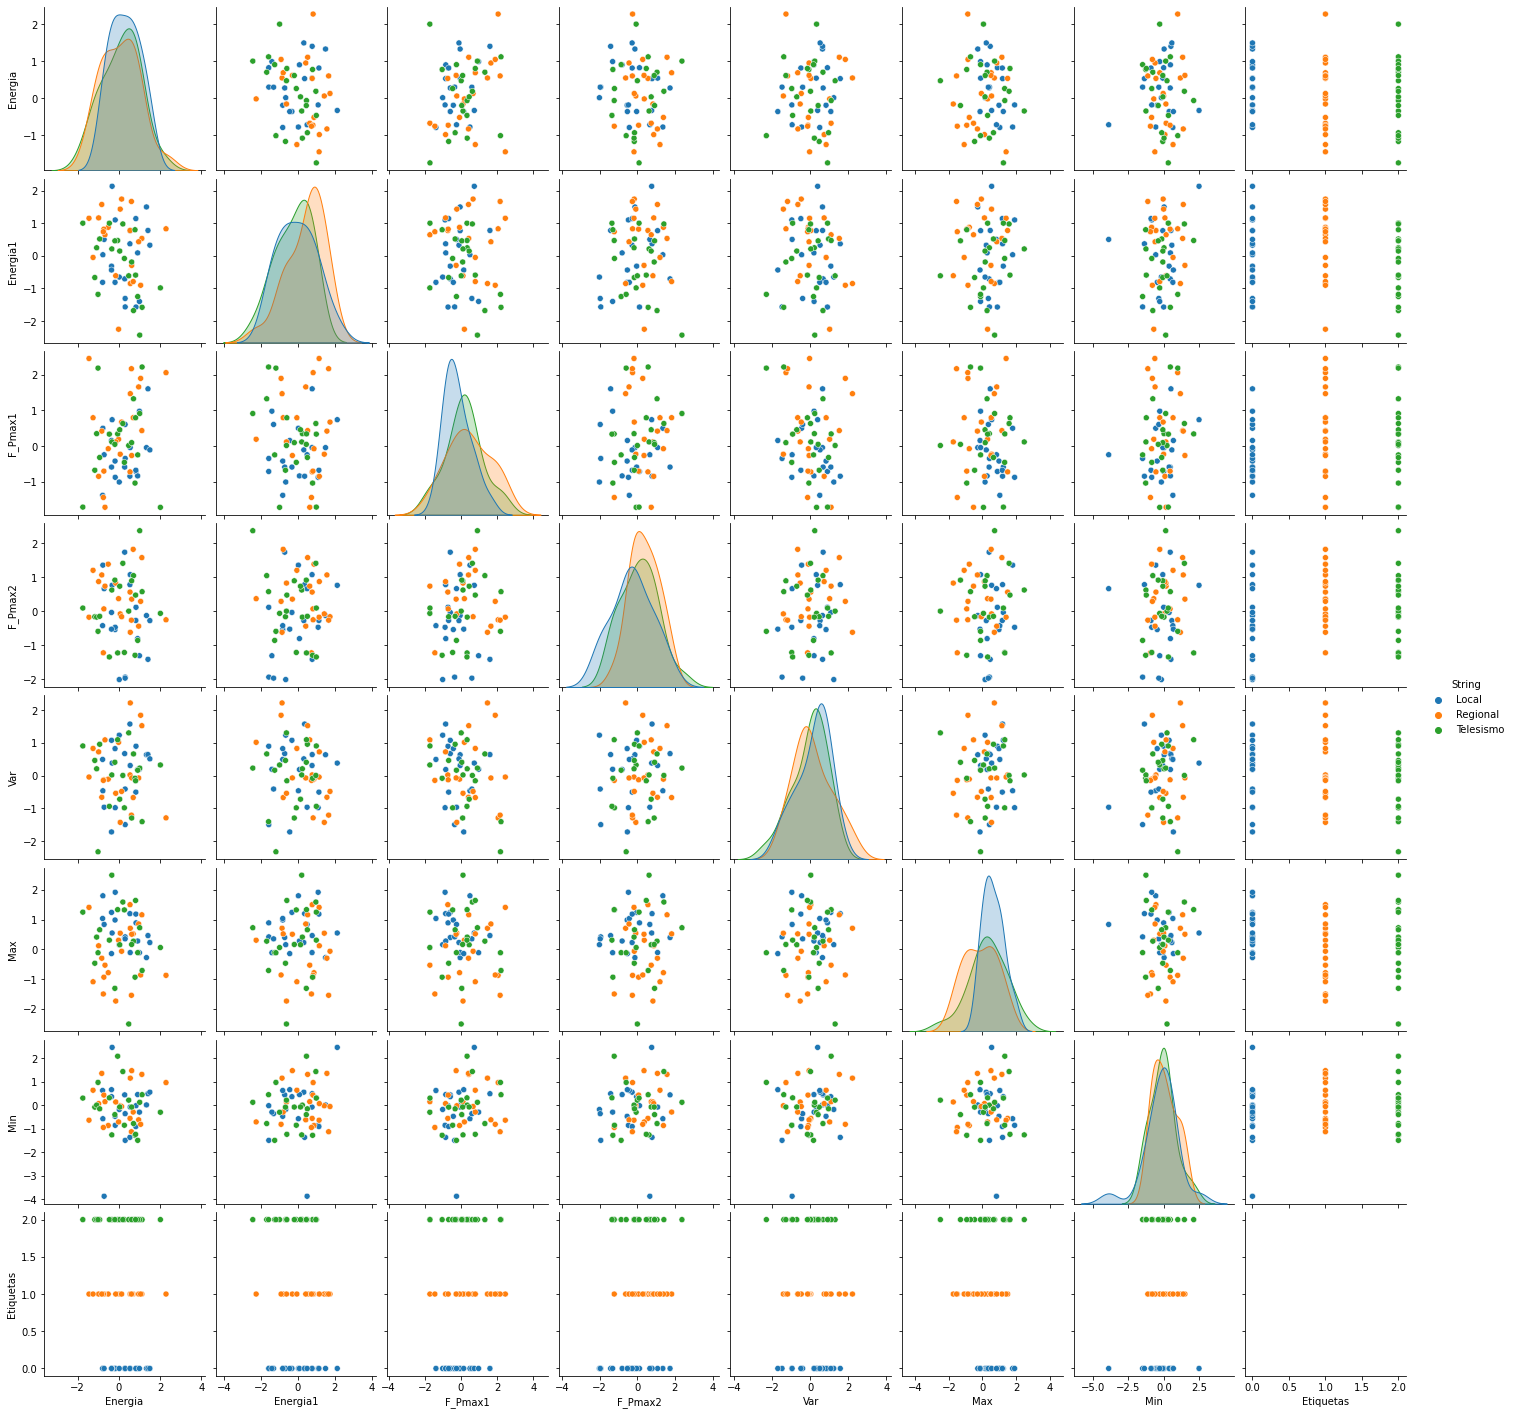

In [28]:
sns.pairplot(df, hue="String")